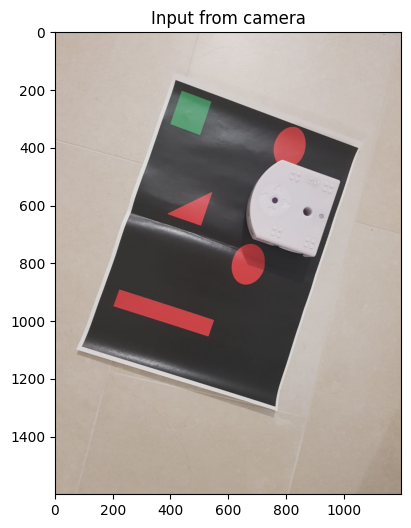

Image shape: (1600, 1200, 3), pixels: 1920000


In [1]:
from libs.vision import get_image_from_file, correct_distortion, threshold_image, get_grid
from libs.vision import get_centroids, get_nose, get_orientation, grid_to_image, image_to_grid
from libs.plot import show_cv2_image, show_distortion, show_thresholds, show_grid, show_nose
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

cam = cv2.VideoCapture(1, cv2.CAP_DSHOW)  # Adjust the index as needed
if not cam.isOpened():
    print("Failed to open camera")
    exit()

# cam.release() can be released at the end

#image = get_image_from_file(os.path.join("robot-env", "r2.jpg"))
image = get_image_from_camera(cam)
show_cv2_image(image, fig_size=(6,6), color="BGR", _title="Input from camera")
print(f"Image shape: {image.shape}, pixels: {image.shape[0]*image.shape[1]}")

In [2]:
show_distortion(image)

interactive(children=(FloatSlider(value=5.0, description='Sigma', max=10.0, min=1.0), FloatSlider(value=0.0025…

In [3]:
sigma = 5
epsilon = 0.01

image = correct_distortion(image, sigma=sigma, epsilon=epsilon)

show_thresholds(image)

interactive(children=(IntSlider(value=190, description='T_WL', max=255), IntSlider(value=140, description='T_R…

In [4]:
T_WL=190

# (0,0,T_RL) < (b,g,r) < (T_RH,T_RH,255)
T_RH=140 # blue green upper bound for red
T_RL=120 # red lower bound for red

# (0,T_GL,0) < (b,g,r) < (T_GH,255,T_GH)
T_GH=140 # blue red upper bound for green
T_GL=120 # green lower bound for green

min_size=5000

image = threshold_image(image, T_WL, T_RH, T_RL, T_GH, T_GL, min_size)

grid = get_grid(image, grid_size=200, verbose=True, full_output=False)

grid_image = grid_to_image(grid)
show_nose(grid_image, sigma_init=5, threshold_init=24, minLineLength_init=20, maxLineGap_init=50, circleSize_init=1)

Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle
Collision start with obstacle


interactive(children=(FloatSlider(value=5.0, description='Sigma', max=10.0, min=1.0), IntSlider(value=24, desc…

In [5]:
nose = get_nose(grid_image, sigma=5, threshold=25, minLineLength=20, maxLineGap=50)

c_obstacles = get_centroids(grid, "obstacle")
c_robot = get_centroids(grid, "start")
c_goal = get_centroids(grid, "goal")

c_robot = c_robot.flatten()
c_goal = c_goal.flatten()
angle_rad, angle_deg = get_orientation(nose, c_robot)

In [ ]:
cam.release()